In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
salary_train = pd.read_csv('SalaryData_Train.csv')

In [4]:
salary_test = pd.read_csv('SalaryData_Test.csv')

In [5]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
salary_train.shape

(30161, 14)

In [7]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
L = salary_train.columns

In [12]:
L = L.drop(["age","educationno","capitalgain","capitalloss","hoursperweek","Salary"])

In [13]:
for i in L:
    salary_train[i] = le.fit_transform(salary_train[i])

In [14]:
for i in L:
    salary_test[i] = le.fit_transform(salary_test[i])

In [15]:
salary_train.dtypes

age               int64
workclass         int32
education         int32
educationno       int64
maritalstatus     int32
occupation        int32
relationship      int32
race              int32
sex               int32
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native            int32
Salary           object
dtype: object

In [16]:
salary_test.dtypes

age               int64
workclass         int32
education         int32
educationno       int64
maritalstatus     int32
occupation        int32
relationship      int32
race              int32
sex               int32
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native            int32
Salary           object
dtype: object

In [17]:
x = salary_train.drop("Salary",axis=1)
y = salary_train[["Salary"]]

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
stdscaler = StandardScaler()

In [20]:
scaled_salary = stdscaler.fit_transform(x)

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [22]:
model.fit(scaled_salary,y)

GaussianNB()

In [23]:
x_test = salary_test.drop("Salary",axis=1)
y_test = salary_test[["Salary"]]

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<AxesSubplot:>

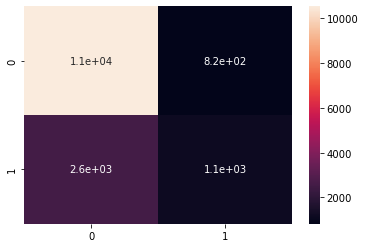

In [26]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [27]:
accuracy_score(y_test,y_pred)

0.7753652058432935

In [28]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()

In [29]:
model2.fit(x,y)

MultinomialNB()

In [30]:
y_pred2 =model2.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred2)

0.7749667994687915